# PyTorch Linear Regression with custom data generatig process

In [1]:
# Import NumPy, PyTorch, torch.nn
import torch
import numpy as np
import torch.nn as nn

## Problem statement

The model will predict crop yields for 2 different fruits: apples, oranges. The predictions are based on the input variables temperature, rainfall, humidity.

The data generating process is as follows:
* apples = 0.5\*temperature + 0.5\*rainfall + 0.2\*humidity
* oranges = 1\*temperature + 0.2\*rainfall - 0.1\*humidity

In [5]:
torch.randint??

In [11]:
torch.rand(4)

tensor([0.4845, 0.1702, 0.7258, 0.8678])

In [57]:
# Define input variables
temperature = torch.randint(low=20, high=70, size=(100,), requires_grad=False)
rainfall = torch.randint(low=0, high=100, size=(100,), requires_grad=False)
humidity = torch.randint(low=0, high=100, size=(100,), requires_grad=False)
inputs = torch.stack([temperature, rainfall, humidity], 1).type(torch.float32)
print(inputs[:5,:])

tensor([[31., 54.,  4.],
        [58., 15., 60.],
        [30., 69., 76.],
        [40., 34., 86.],
        [47., 74., 43.]])


In [64]:
# Calculate target variables based on DGP
apples_coeff = torch.tensor([0.5, 0.5, 0.2])
apples = torch.sum(inputs*apples_coeff, dim=1)
print(apples[:5])
oranges_coeff = torch.tensor([1, 0.2, -0.1])
oranges = torch.sum(inputs*oranges_coeff, dim=1)
print(oranges[:5])
targets = torch.stack([apples, oranges], dim=1).type(torch.float32)
print(targets[:5,:])

tensor([43.3000, 48.5000, 64.7000, 54.2000, 69.1000])
tensor([41.4000, 55.0000, 36.2000, 38.2000, 57.5000])
tensor([[43.3000, 41.4000],
        [48.5000, 55.0000],
        [64.7000, 36.2000],
        [54.2000, 38.2000],
        [69.1000, 57.5000]])


## Dataset, Dataloader

We'll create a dataset and a dataloader, which allow us to split the data into batches while training. It also lets us shuffle the data.

In [141]:
# Import TensorDataset, DataLoader
from torch.utils.data import TensorDataset, DataLoader

In [142]:
train_ds = TensorDataset(inputs, targets)
train_ds[:3,:]

(tensor([[31., 54.,  4.],
         [58., 15., 60.],
         [30., 69., 76.]]), tensor([[43.3000, 41.4000],
         [48.5000, 55.0000],
         [64.7000, 36.2000]]))

In [153]:
batch_size = 10
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [176]:
# next(iter(train_dl))

## SimpleNet

In [177]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 5)
        self.act1 = nn.ReLU()
        self.linear2 = nn.Linear(5, 2)
        
    def forward(self, x):
        x = self.linear1(x)
        #x = self.act1(x)
        x = self.linear2(x)
        return x

In [185]:
# Instantiate the model
model = SimpleNet()

## Optimizer

In [186]:
# Define optimizer
lr = 1e-5
opt = torch.optim.SGD(model.parameters(), lr=lr)

## Loss function

In [148]:
import torch.nn.functional as F

In [149]:
loss_fn = F.mse_loss

In [162]:
# loss = loss_fn(model(inputs), targets)
# print(loss)

## Training

We define the same function fit as before.

In [204]:
losses = []
def fit(num_epochs, model, loss_fn, opt):    
    for epoch in range(num_epochs):
        for xb, yb in train_dl:
            # Forward            
            preds = model(xb)
            loss = loss_fn(preds, yb)
            losses.append(loss)
            
            # Gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
            
        if epoch%10==0:
            print('Training loss:', loss_fn(model(inputs), targets))

The training error should converge quickly to the minimum since we have a perfect linear relationship in the DGP.

In [213]:
# Train for 100 epochs
#losses = []
fit(num_epochs=100, model=model, loss_fn=loss_fn, opt=opt)

Training loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Training loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Training loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Training loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Training loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Training loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Training loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Training loss: tensor(0.0151, grad_fn=<MseLossBackward>)
Training loss: tensor(0.0150, grad_fn=<MseLossBackward>)
Training loss: tensor(0.0151, grad_fn=<MseLossBackward>)


In [206]:
# Reset the model and optimizer for re-training from zero.
model = SimpleNet()
opt = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
from matplotlib import pyplot as plt

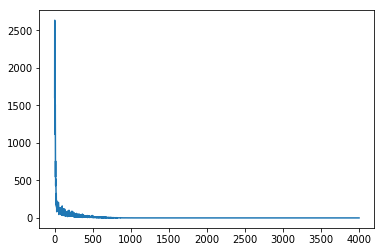

In [214]:
plt.plot(losses)

In [215]:
preds = model(inputs)
print(preds[:10])

tensor([[43.5506, 41.5015],
        [48.4779, 54.9917],
        [64.7563, 36.2240],
        [54.2249, 38.2111],
        [69.0825, 57.4938],
        [76.3744, 37.0912],
        [72.7191, 36.0092],
        [37.3405, 25.3977],
        [39.6335, 36.2545],
        [48.4628, 53.1857]], grad_fn=<SliceBackward>)


In [216]:
print(targets[:10])

tensor([[43.3000, 41.4000],
        [48.5000, 55.0000],
        [64.7000, 36.2000],
        [54.2000, 38.2000],
        [69.1000, 57.5000],
        [76.4000, 37.1000],
        [72.7000, 36.0000],
        [37.1000, 25.3000],
        [39.5000, 36.2000],
        [48.5000, 53.2000]])
